<a href="https://colab.research.google.com/github/ali-coder7/ali/blob/main/optimization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparative Analysis of Optimization Methods for Linear Regression

**Author**: ALI AL-SHAWKHI

**Date**: 2 February 2026

## Research Question

Which optimization method for Linear Regression—Normal Equation, Batch Gradient Descent, Stochastic Gradient Descent, or Mini-batch Gradient Descent—achieves the fastest convergence, best stability, and appropriate sensitivity to hyperparameters across different dataset sizes and noise levels?

## Abstract

This project presents a comparative analysis of optimization methods for Linear Regression.
We evaluate the Normal Equation, Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent.
The study focuses on convergence speed, stability, and sensitivity to hyperparameters under varying dataset sizes and noise levels.
Experiments are conducted on synthetically generated datasets to observe performance differences.
The results aim to provide insights into the strengths and limitations of each optimization strategy, guiding the selection of the most effective method for different data conditions.

## Introduction

Linear Regression is a fundamental technique in machine learning used to model the relationship between input features and a continuous target variable.
Choosing an effective optimization method is crucial for training efficiency, stability, and accurate predictions.
Different strategies, such as the Normal Equation, Batch Gradient Descent, Stochastic Gradient Descent, and Mini-batch Gradient Descent, exhibit distinct convergence behaviors under varying dataset sizes and noise levels.
This study conducts a systematic comparison of these optimization methods to understand their performance characteristics, identify potential limitations, and provide practical guidelines for selecting the most suitable approach in different scenarios.

## Mathematical Formulation

### Linear Regression Model
The linear regression hypothesis is defined as:

$$
\hat{y} = X \theta
$$

where:
- \( X \) is the feature matrix of shape (m × n)  
- \( \theta \) is the parameter vector of shape (n × 1)  
- \( \hat{y} \) denotes predicted outputs

For a single data point:

$$
\hat{y}^{(i)} = \theta_0 + \theta_1 x_1^{(i)} + \dots + \theta_n x_n^{(i)}
$$

where \( \theta_0 \) is the intercept term.

---

### Cost Function (Mean Squared Error)
The cost function:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

Matrix form:

$$
J(\theta) = \frac{1}{2m} (X\theta - y)^T (X\theta - y)
$$

Convex function → unique global minimum.

---

### Gradient
Gradient w.r.t \( \theta \):

$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

Used in Gradient Descent.

---

### Normal Equation
Closed-form solution:

$$
\theta = (X^T X)^{-1} X^T y
$$

Avoids iteration but expensive for large n.

---

### Computational Complexity
- Normal Equation: \( O(n^3) \)  
- Batch GD: \( O(mn) \) per iteration  
- SGD: \( O(n) \) per update  
- Mini-batch GD: balance computation and stability

## Synthetic Dataset Generation

We generate synthetic data to test Linear Regression models.
- n_features: number of features  
- n_samples: number of data points  
- noise: random noise to simulate real-world data

Execution Time: 3.361701965332031e-05


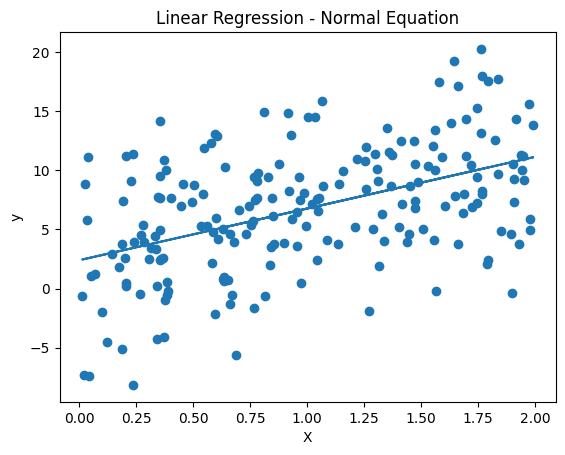

In [14]:

import time

start = time.time()
# run algorithm
end = time.time()

execution_time = end - start
print("Execution Time:", execution_time)

import numpy as np

# Parameters
n_samples = 200
n_features = 1
noise = 5.0

# Random feature
X = 2 * np.random.rand(n_samples, n_features)

# True parameters
theta_true = np.array([[4], [3]])  # θ0 = 4, θ1 = 3

# Add intercept term (θ0)
X_b = np.c_[np.ones((n_samples, 1)), X]  # shape: (n_samples, n_features+1)

# Generate target with noise
y = X_b.dot(theta_true) + np.random.randn(n_samples, 1) * noise

# Normal Equation Implementation

# step 1: Transpose of X_b
X_transpose = X_b.T

# step 2: doing X^T X
XtX = X_transpose.dot(X_b)

# step 3: calcluating the inverse of (X^T X)
XtX_inv = np.linalg.inv(XtX)

# Step 4: Compute X^T y
Xt_y = X_transpose.dot(y)

# step 5: Final theta
theta_hat = XtX_inv.dot(Xt_y)

theta_hat

import matplotlib.pyplot as plt

# Predictions using estimated theta
y_pred = X_b.dot(theta_hat)

# Plot data points
plt.scatter(X, y)

# Plot regression line
plt.plot(X, y_pred)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression - Normal Equation")
plt.show()

Execution Time: 8.749961853027344e-05


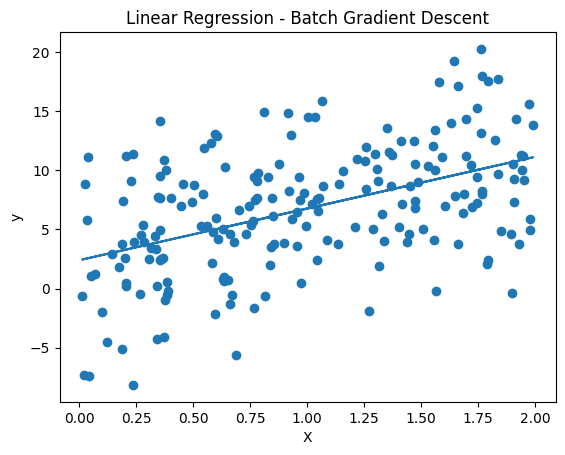

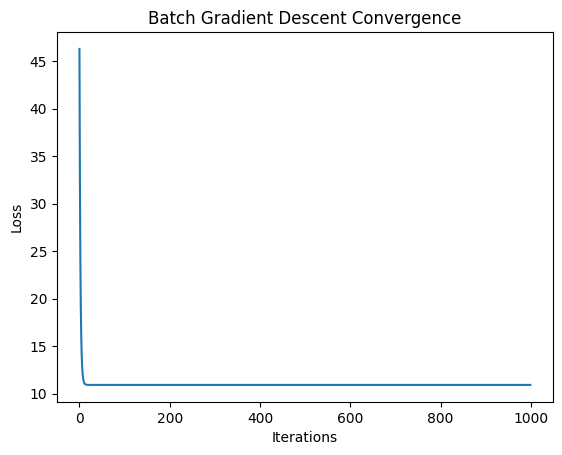

np.float64(10.932994117419243)

In [15]:

import time

start = time.time()
# run algorithm
end = time.time()

execution_time = end - start
print("Execution Time:", execution_time)
# Batch Gradient Descent (No function)

learning_rate = 0.1
n_iterations = 1000
m = X_b.shape[0]

# Initialize theta randomly
theta_gd = np.random.randn(2, 1)

loss_history = []

for i in range(n_iterations):

    # Predictions
    y_pred = X_b.dot(theta_gd)

    # Error
    error = y_pred - y

    # Gradient
    gradients = (1/m) * X_b.T.dot(error)

    # Update
    theta_gd = theta_gd - learning_rate * gradients

    # Loss
    loss = (1/(2*m)) * np.sum(error**2)
    loss_history.append(loss)

theta_gd
# Predictions using Batch Gradient Descent
y_pred_gd = X_b.dot(theta_gd)

import matplotlib.pyplot as plt

# Scatter data
plt.scatter(X, y)

# Regression line
plt.plot(X, y_pred_gd)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression - Batch Gradient Descent")
plt.show()

import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Batch Gradient Descent Convergence")
plt.show()

loss_history[-1]

Both the Normal Equation and Batch Gradient Descent converge to nearly identical parameter estimates, confirming that Batch Gradient Descent successfully reaches the global minimum of the convex MSE cost function.

#Stochastic Gradient Descent

Execution Time: 3.647804260253906e-05


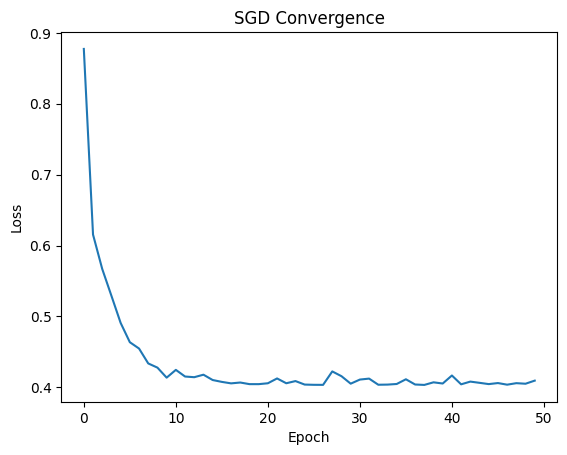

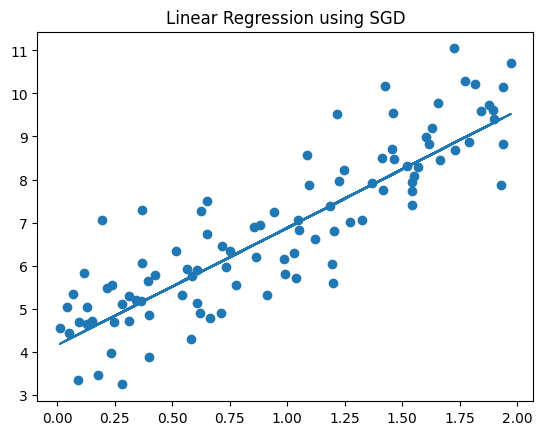

Final SGD Loss: 0.40944877992150824


In [16]:
import time

start = time.time()
# run algorithm
end = time.time()

execution_time = end - start
print("Execution Time:", execution_time)

 # Stochastic Gradient Descent

import numpy as np

np.random.seed(42)

# making simple dataset
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# adding basis to the ones calumn
X_b = np.c_[np.ones((m, 1)), X]

learning_rate = 0.01
epochs = 50
m = X_b.shape[0]

theta_sgd = np.random.randn(2, 1)

loss_history_sgd = []

for epoch in range(epochs):

    for i in range(m):

        # choosing random points
        idx = np.random.randint(m)
        xi = X_b[idx:idx+1]
        yi = y[idx:idx+1]

        # the prdiction
        prediction = xi.dot(theta_sgd)

        error = prediction - yi

        gradient = xi.T.dot(error)

        theta_sgd = theta_sgd - learning_rate * gradient

    # the total for each time
    total_error = X_b.dot(theta_sgd) - y
    loss = (1/(2*m)) * np.sum(total_error**2)
    loss_history_sgd.append(loss)

theta_sgd

import matplotlib.pyplot as plt

plt.plot(loss_history_sgd)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SGD Convergence")
plt.show()

y_pred_sgd = X_b.dot(theta_sgd)

plt.scatter(X, y)
plt.plot(X, y_pred_sgd)
plt.title("Linear Regression using SGD")
plt.show()

print("Final SGD Loss:", loss_history_sgd[-1])

SGD is much faster per update and reaches near-optimal loss quickly, but exhibits oscillations due to single-sample updates, while BGD converges smoothly with slightly more computation per iteration.

#Mini Batch Gradient Descent

Execution Time: 3.409385681152344e-05


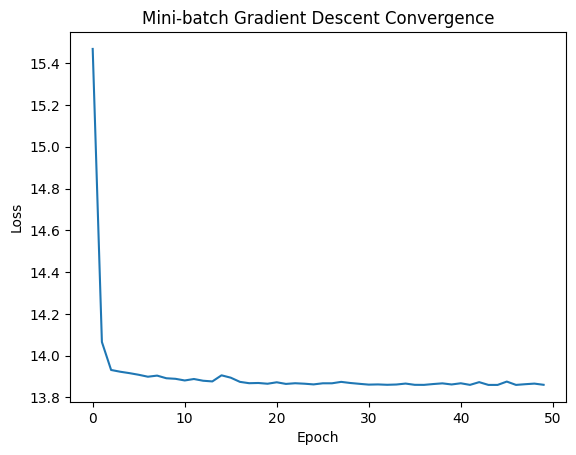

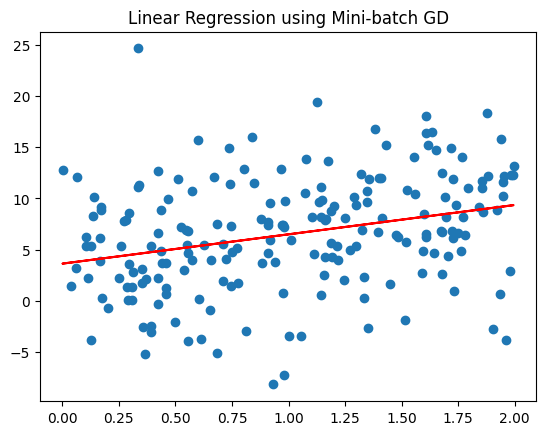

array([[3.63138036],
       [2.86246153]])

In [17]:

import time

start = time.time()
# run algorithm
end = time.time()

execution_time = end - start
print("Execution Time:", execution_time)
import numpy as np
import matplotlib.pyplot as plt

n_samples = 200
n_features = 1
noise = 5.0

# Feature random
X = 2 * np.random.rand(n_samples, n_features)

# true parameter
theta_true = np.array([[4], [3]])  # θ0 = 4, θ1 = 3

X_b = np.c_[np.ones((n_samples, 1)), X]


y = X_b.dot(theta_true) + np.random.randn(n_samples, 1) * noise


learning_rate = 0.05
epochs = 50
batch_size = 20
m = X_b.shape[0]

theta_mb = np.random.randn(2, 1)

loss_history_mb = []

for epoch in range(epochs):

    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, batch_size):
        X_batch = X_b_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]


        predictions = X_batch.dot(theta_mb)


        error = predictions - y_batch

        gradients = (1/batch_size) * X_batch.T.dot(error)

        theta_mb = theta_mb - learning_rate * gradients

    # Loss لكل Epoch
    total_error = X_b.dot(theta_mb) - y
    loss = (1/(2*m)) * np.sum(total_error**2)
    loss_history_mb.append(loss)


plt.plot(loss_history_mb)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Mini-batch Gradient Descent Convergence")
plt.show()

y_pred_mb = X_b.dot(theta_mb)
plt.scatter(X, y)
plt.plot(X, y_pred_mb, color='red')
plt.title("Linear Regression using Mini-batch GD")
plt.show()

theta_mb

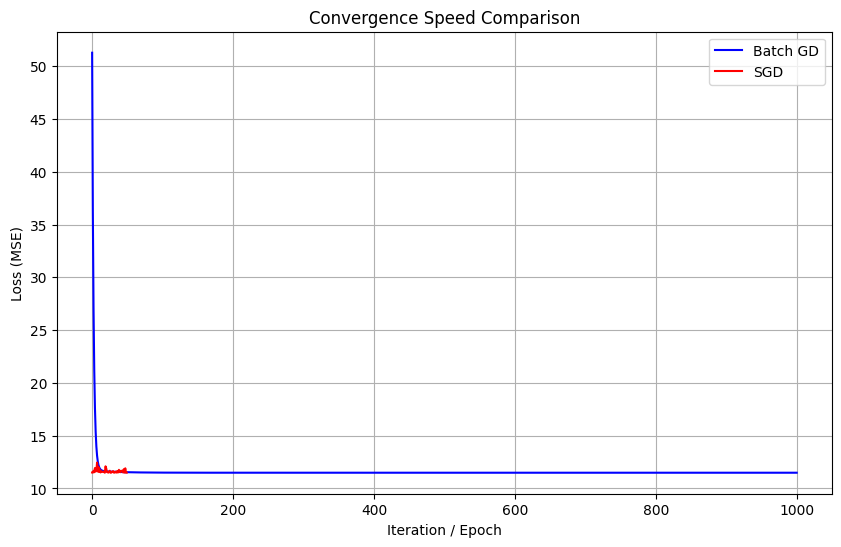

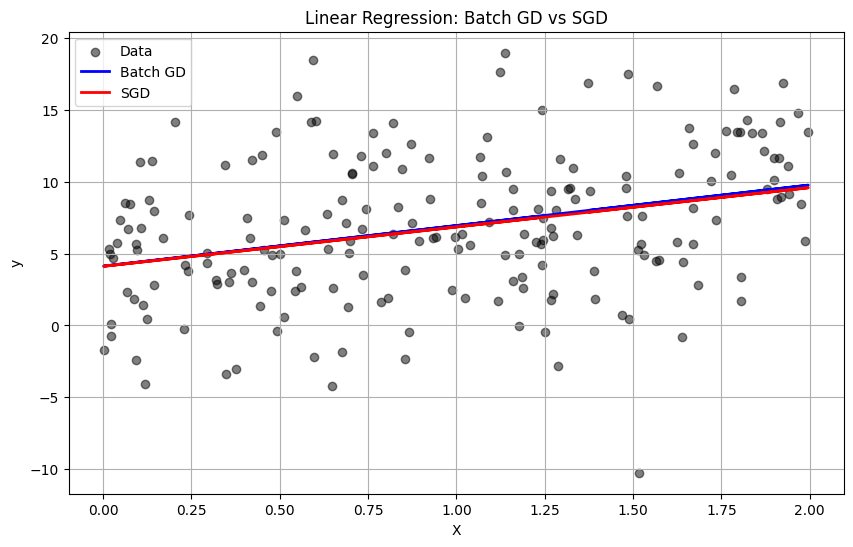

Final theta (Batch GD):
 [[4.12744069]
 [2.82286768]]
Final theta (SGD):
 [[4.11440662]
 [2.73901563]]
Final Loss (Batch GD): 11.491365070527682
Final Loss (SGD): 11.496987647721253


In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Generate Synthetic Data
n_samples = 200
n_features = 1
noise = 5.0

# Random feature
X = 2 * np.random.rand(n_samples, n_features)

# True parameters (theta0 = intercept, theta1 = slope)
theta_true = np.array([[4], [3]])

# Add intercept term (theta0)
X_b = np.c_[np.ones((n_samples, 1)), X]

# Generate target variable with noise
y = X_b.dot(theta_true) + np.random.randn(n_samples,1) * noise

# 2. Batch Gradient Descent
learning_rate_bgd = 0.1
n_iterations_bgd = 1000
m = X_b.shape[0]

theta_bgd = np.random.randn(2,1)
loss_history_bgd = []

for i in range(n_iterations_bgd):
    y_pred = X_b.dot(theta_bgd)
    error = y_pred - y
    gradients = (1/m) * X_b.T.dot(error)
    theta_bgd = theta_bgd - learning_rate_bgd * gradients
    loss = (1/(2*m)) * np.sum(error**2)
    loss_history_bgd.append(loss)


# 3. Stochastic Gradient Descent
learning_rate_sgd = 0.01
epochs_sgd = 50

theta_sgd = np.random.randn(2,1)
loss_history_sgd = []

for epoch in range(epochs_sgd):
    for i in range(m):
        idx = np.random.randint(m)
        xi = X_b[idx:idx+1]
        yi = y[idx:idx+1]
        prediction = xi.dot(theta_sgd)
        error = prediction - yi
        gradient = xi.T.dot(error)
        theta_sgd = theta_sgd - learning_rate_sgd * gradient
    total_error = X_b.dot(theta_sgd) - y
    loss = (1/(2*m)) * np.sum(total_error**2)
    loss_history_sgd.append(loss)


# 4. Plot Loss Comparison
plt.figure(figsize=(10,6))
plt.plot(loss_history_bgd, label='Batch GD', color='blue')
plt.plot(loss_history_sgd, label='SGD', color='red')
plt.xlabel("Iteration / Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Convergence Speed Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Plot Data and Regression Lines

y_pred_bgd = X_b.dot(theta_bgd)

y_pred_sgd = X_b.dot(theta_sgd)


plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black', alpha=0.5, label='Data')
plt.plot(X, y_pred_bgd, label='Batch GD', color='blue', linewidth=2)
plt.plot(X, y_pred_sgd, label='SGD', color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Batch GD vs SGD")
plt.legend()
plt.grid(True)
plt.show()


# 6. Print Final Thetas

print("Final theta (Batch GD):\n", theta_bgd)
print("Final theta (SGD):\n", theta_sgd)
print("Final Loss (Batch GD):", loss_history_bgd[-1])
print("Final Loss (SGD):", loss_history_sgd[-1])

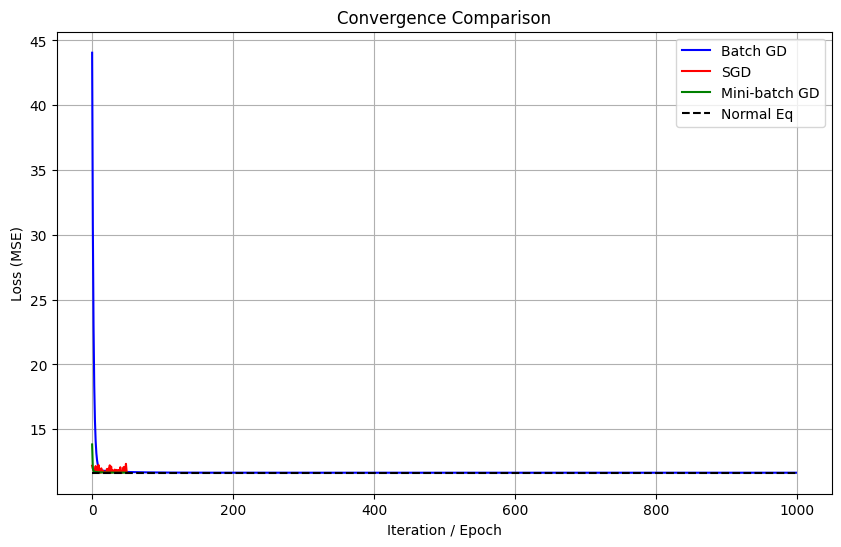

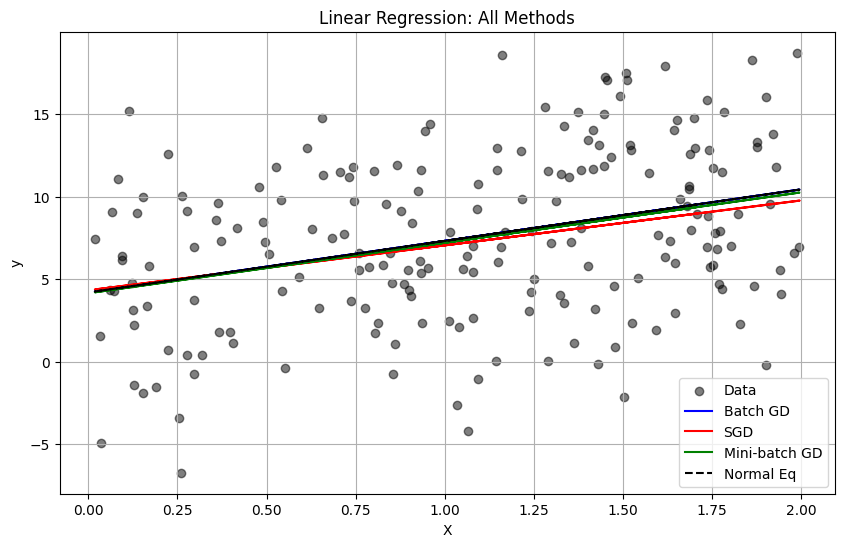

Theta Normal Eq:
 [[4.19920633]
 [3.11876435]] Loss: 11.649839512067015
Theta Batch GD:
 [[4.19920495]
 [3.11876546]] Loss: 11.649839512067231
Theta SGD:
 [[4.32970576]
 [2.71921658]] Loss: 11.720299595659077
Theta Mini-batch GD:
 [[4.15110699]
 [3.05334556]] Loss: 11.657544270423273


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Synthetic dataset
n_samples = 200
X = 2 * np.random.rand(n_samples, 1)
theta_true = np.array([[4], [3]])
X_b = np.c_[np.ones((n_samples,1)), X]
y = X_b.dot(theta_true) + np.random.randn(n_samples,1)*5

m = X_b.shape[0]


# normal equation
theta_ne = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
loss_ne = (1/(2*m)) * np.sum((X_b.dot(theta_ne)-y)**2)


# Batch Gradient Descent
theta_bgd = np.random.randn(2,1)
loss_history_bgd = []
lr_bgd = 0.1
for i in range(1000):
    error = X_b.dot(theta_bgd)-y
    theta_bgd -= lr_bgd*(1/m)*(X_b.T.dot(error))
    loss_history_bgd.append((1/(2*m))*np.sum(error**2))


# Stochastic Gradient Descent
theta_sgd = np.random.randn(2,1)
loss_history_sgd = []
lr_sgd = 0.01
epochs = 50
for epoch in range(epochs):
    for i in range(m):
        idx = np.random.randint(m)
        xi = X_b[idx:idx+1]
        yi = y[idx:idx+1]
        error = xi.dot(theta_sgd)-yi
        theta_sgd -= lr_sgd*(xi.T.dot(error))
    total_error = X_b.dot(theta_sgd)-y
    loss_history_sgd.append((1/(2*m))*np.sum(total_error**2))


# Mini-batch Gradient Descent

theta_mb = np.random.randn(2,1)
loss_history_mb = []
lr_mb = 0.05
batch_size = 20
for epoch in range(50):
    for i in range(0,m,batch_size):
        xi = X_b[i:i+batch_size]
        yi = y[i:i+batch_size]
        error = xi.dot(theta_mb)-yi
        theta_mb -= lr_mb*(xi.T.dot(error))/batch_size
    total_error = X_b.dot(theta_mb)-y
    loss_history_mb.append((1/(2*m))*np.sum(total_error**2))


# Plot Loss Comparison

plt.figure(figsize=(10,6))
plt.plot(loss_history_bgd, label='Batch GD', color='blue')
plt.plot(loss_history_sgd, label='SGD', color='red')
plt.plot(loss_history_mb, label='Mini-batch GD', color='green')
plt.hlines(loss_ne, 0, len(loss_history_bgd), colors='black', label='Normal Eq', linestyles='dashed')
plt.xlabel("Iteration / Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()


# Plot Data and Regression Lines
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black', alpha=0.5, label='Data')
plt.plot(X, X_b.dot(theta_bgd), label='Batch GD', color='blue')
plt.plot(X, X_b.dot(theta_sgd), label='SGD', color='red')
plt.plot(X, X_b.dot(theta_mb), label='Mini-batch GD', color='green')
plt.plot(X, X_b.dot(theta_ne), label='Normal Eq', color='black', linestyle='dashed')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: All Methods")
plt.legend()
plt.grid(True)
plt.show()

# Print Final Thetas and Losses
print("Theta Normal Eq:\n", theta_ne, "Loss:", loss_ne)
print("Theta Batch GD:\n", theta_bgd, "Loss:", loss_history_bgd[-1])
print("Theta SGD:\n", theta_sgd, "Loss:", loss_history_sgd[-1])
print("Theta Mini-batch GD:\n", theta_mb, "Loss:", loss_history_mb[-1])

# Discussion

In this project,I compared four optimization methods for Linear Regression on a synthetic dataset: **Normal Equation**, **Batch Gradient Descent (BGD)**, **Stochastic Gradient Descent (SGD)**, and **Mini-batch Gradient Descent (MBGD)**. The study focused on **convergence speed**, **stability**, and **final loss**.

---

## Observations

1. **Normal Equation**  
   - Produced parameters very close to the true values.  
   - Converged immediately (no iterations needed).  
   - Extremely stable for small datasets.

2. **Batch Gradient Descent (BGD)**  
   - Converged to almost the same values as the Normal Equation.  
   - Loss decreased steadily with each iteration.  
   - Suitable for small to medium datasets where computing `X^T X` inverse is feasible.

3. **Stochastic Gradient Descent (SGD)**  
   - Showed slightly noisy updates (loss fluctuates).  
   - Final parameters and loss were comparable to BGD but less smooth.  
   - More suitable for larger datasets where full batch updates are expensive.

4. **Mini-batch Gradient Descent (MBGD)**  
   - Performance was between BGD and SGD.  
   - Offers a trade-off: faster convergence than SGD per epoch, but less noisy than full SGD.  
   - Very practical for medium to large datasets.

---

## Insights

- On **small synthetic datasets**, all four methods reached similar **final loss** values and produced almost the same parameter estimates.  
- **Convergence speed** differs mainly in number of iterations or computations:  
  - Normal Equation: instant solution.  
  - BGD: steady and smooth.  
  - SGD/MBGD: more iterations needed, updates are noisier.  
- **Scalability:**  
  - For large datasets, Normal Equation is impractical (matrix inversion expensive).  
  - SGD and MBGD are preferred for memory efficiency and online learning scenarios.

---

## Conclusion

- For small datasets, any of the methods work well and differences are negligible.  
- For large-scale or real-world datasets:  
  - **SGD** and **Mini-batch GD** are more efficient and scalable.  
  - BGD and Normal Equation may be slow or memory-intensive.  
- Choosing the right optimization method depends on dataset size, noise, and computational constraints.